# Ex. 2


In [1]:
id1 = "206263154"
id2 = "209130012"

name_student_1 = "Nave, Lutzky"
name_student_2 = "Shirel, Harel"


import pandas as pd
df = pd.DataFrame([id1,id2])
# Uncomment in case two students are doing the assignment together
#df = pd.DataFrame([id1])
#df = pd.DataFrame([id1,id2])
df.to_clipboard(index=False,header=False)
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url)
vacc_Norway_df = vacc_df.loc[vacc_df.location == 'Norway']
vacc_Norway_df1=vacc_Norway_df.copy()




**Solution to question 1:**  
Our country is Norway, and we present the first 3 lines at the file

In [2]:
#we chose Norway
vacc_Norway_df1.head(3)


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
8318,Norway,NOR,2020-12-27,5.0,5.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
8319,Norway,NOR,2020-12-28,609.0,609.0,NaN,604.0,604.0,0.01,0.01,NaN,111.0
8320,Norway,NOR,2020-12-29,1676.0,1676.0,NaN,1067.0,836.0,0.03,0.03,NaN,154.0


**Solution to question 2:**

We present the column with the maximum missing values and the number of the max value

In [11]:

num_nan_values= vacc_Norway_df1.isnull().sum()
print(f" Column : {num_nan_values.idxmax()}, Value : {num_nan_values.max()}")
#num_nan_values

 Column : people_fully_vaccinated, Value : 21


**Solution to question 3:**  

We present the line (there is only 1 line) with missing value at the column 'daily_vaccinations'

In [4]:
vacc_Norway_df1[vacc_Norway_df1.daily_vaccinations.isnull()]


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
8318,Norway,NOR,2020-12-27,5.0,5.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN


 **Solution to question 4:**  
 
 
We decided to fill in the missing value with 0 by using 'fillna()' function. Since there was only one missing value, we assumed that the only day there were no vaccines was a holiday,  or something happend in the country that day, or there was a delay that day, so people were not vaccinated.

In [5]:

pd.DataFrame(vacc_Norway_df1['daily_vaccinations'].fillna(0 , inplace= False))

,daily_vaccinations
8318,0.0
8319,604.0
8320,836.0
8321,699.0
8322,542.0
...,...
8420,21581.0
8421,24796.0
8422,24913.0
8423,24931.0


 **Solution to question 5:**
 
 We created a histogram for the columns 'total_vaccinations' and 'people_vaccinated' 

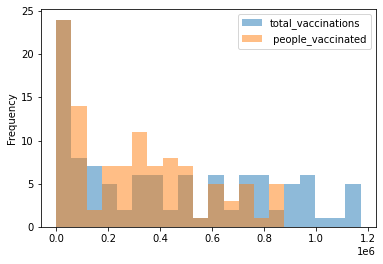

In [6]:
histogramy = pd.DataFrame({'total_vaccinations': vacc_Norway_df1.total_vaccinations, ' people_vaccinated': vacc_Norway_df1.people_vaccinated})
hist=histogramy.plot.hist(bins=20,alpha=0.5)
hist

 **Solution to question 6:**
 
 We created a boxplot and we show that the green line is the median
 
 *and we learned  at the lesson that this line showes the median

The median is :  3.035


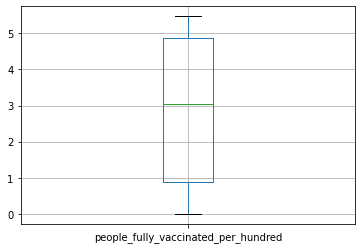

In [7]:

vacc_Norway_df1.boxplot('people_fully_vaccinated_per_hundred')
print('The median is : ' ,vacc_Norway_df1['people_fully_vaccinated_per_hundred'].median())



 **Solution to question 7:**
 
 We created a new column named- 'month', and we showed the max month's values for the columns 'people_vaccinated_per_hundred' and 'daily_vaccinations'.
 

In [8]:
vacc_Norway_df1['month']=pd.DatetimeIndex(vacc_Norway_df1.date).month
vacc_Norway_month1=vacc_Norway_df1['month']
vacc_Norway_month1 = vacc_Norway_df1.groupby('month')[['people_vaccinated_per_hundred' ,'daily_vaccinations']].max()

vacc_Norway_month1

,people_vaccinated_per_hundred,daily_vaccinations
month,,
1,2.01,6842.0
2,6.20,14726.0
3,12.78,20709.0
4,16.12,25229.0
12,0.04,836.0


 **Solution to question 8:**
 
 We sort the values from the previous question according to 'people_vaccinated_per_hundred' from the min value to max.

In [9]:
vacc_Norway_month1.sort_values('people_vaccinated_per_hundred',ascending=True)


,people_vaccinated_per_hundred,daily_vaccinations
month,,
12,0.04,836.0
1,2.01,6842.0
2,6.20,14726.0
3,12.78,20709.0
4,16.12,25229.0
